In [31]:
import nltk
import gensim
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [32]:
corpus = [
    "Next word prediction is the task of forecasting the most likely word that follows a given sequence of text.",
    "It uses Natural Language Processing (NLP) to understand and process human language.",
    "Early approaches relied on n-gram models, which had limitations like short context and data sparsity.",
    "Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks improved sequence modeling by learning longer dependencies.",
    "Transformer-based models like BERT and GPT revolutionized predictions with self-attention mechanisms and full-context awareness.",
    "These models are trained on massive corpora to learn grammar, semantics, and contextual patterns.",
    "Next word prediction is widely used in smart keyboards, chatbots, virtual assistants, email composition, and search engines.",
    "It enhances user experience by making communication faster and more intuitive.",
    "Advancements in deep learning continue to improve accuracy and contextual relevance in predictions.",
    "The future includes more personalized and multimodal systems combining text, voice, and visual inputs."
]

In [33]:
s = "My Name is Vikas jangid 123 456 7890  ."
s.lower()

'my name is vikas jangid 123 456 7890  .'

In [34]:
s = re.sub(r'\d+','',s)  # Remove digits
s

'My Name is Vikas jangid     .'

In [35]:
string.punctuation  # Remove punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
s.translate(str.maketrans("","", string.punctuation))

'My Name is Vikas jangid     '

In [37]:
s = "My Name is Vikas jangid 123 456 7890  ."

In [38]:
word_tokenize(s)  # Tokenize the string

['My', 'Name', 'is', 'Vikas', 'jangid', '123', '456', '7890', '.']

In [39]:
s1 = ['My', 'Name', 'is', 'Vikas', 'jangid', '123', '456', '7890', '.']

In [40]:
[i for i in s1 if i not in stopwords.words('english')]

['My', 'Name', 'Vikas', 'jangid', '123', '456', '7890', '.']

In [41]:
def word_preprocessing(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the string
    tokens = [i for i in tokens if i not in stopwords.words('english')]  # Remove stopwords
    return tokens

In [42]:
corpus

['Next word prediction is the task of forecasting the most likely word that follows a given sequence of text.',
 'It uses Natural Language Processing (NLP) to understand and process human language.',
 'Early approaches relied on n-gram models, which had limitations like short context and data sparsity.',
 'Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks improved sequence modeling by learning longer dependencies.',
 'Transformer-based models like BERT and GPT revolutionized predictions with self-attention mechanisms and full-context awareness.',
 'These models are trained on massive corpora to learn grammar, semantics, and contextual patterns.',
 'Next word prediction is widely used in smart keyboards, chatbots, virtual assistants, email composition, and search engines.',
 'It enhances user experience by making communication faster and more intuitive.',
 'Advancements in deep learning continue to improve accuracy and contextual relevance in predictions.',
 'T

In [43]:
processed_corpus = [word_preprocessing(sentence) for sentence in corpus]

In [44]:
processed_corpus

[['next',
  'word',
  'prediction',
  'task',
  'forecasting',
  'likely',
  'word',
  'follows',
  'given',
  'sequence',
  'text'],
 ['uses',
  'natural',
  'language',
  'processing',
  'nlp',
  'understand',
  'process',
  'human',
  'language'],
 ['early',
  'approaches',
  'relied',
  'ngram',
  'models',
  'limitations',
  'like',
  'short',
  'context',
  'data',
  'sparsity'],
 ['recurrent',
  'neural',
  'networks',
  'rnns',
  'long',
  'shortterm',
  'memory',
  'lstm',
  'networks',
  'improved',
  'sequence',
  'modeling',
  'learning',
  'longer',
  'dependencies'],
 ['transformerbased',
  'models',
  'like',
  'bert',
  'gpt',
  'revolutionized',
  'predictions',
  'selfattention',
  'mechanisms',
  'fullcontext',
  'awareness'],
 ['models',
  'trained',
  'massive',
  'corpora',
  'learn',
  'grammar',
  'semantics',
  'contextual',
  'patterns'],
 ['next',
  'word',
  'prediction',
  'widely',
  'used',
  'smart',
  'keyboards',
  'chatbots',
  'virtual',
  'assistant

In [45]:
#for sentence in corpus:
#    processed_corpus = word_preprocessing(sentence)
#    print(processed_corpus)

In [46]:
# Create the Word2Vec model
word2vec_cbow = Word2Vec(sentences= processed_corpus, vector_size=100, window=5, min_count=1, sg=0)
word2vec_skipgram = Word2Vec(sentences= processed_corpus, vector_size=100, window=5, min_count=1, sg=1)

In [47]:
word2vec_cbow

In [48]:
word2vec_skipgram

In [49]:
print(list(word2vec_skipgram.wv.key_to_index.keys()))

['models', 'word', 'text', 'predictions', 'learning', 'contextual', 'networks', 'like', 'language', 'next', 'sequence', 'prediction', 'memory', 'neural', 'likely', 'rnns', 'forecasting', 'long', 'shortterm', 'lstm', 'sparsity', 'improved', 'modeling', 'task', 'longer', 'dependencies', 'transformerbased', 'recurrent', 'data', 'uses', 'context', 'natural', 'given', 'processing', 'nlp', 'understand', 'process', 'human', 'early', 'approaches', 'relied', 'ngram', 'gpt', 'limitations', 'follows', 'short', 'bert', 'inputs', 'visual', 'selfattention', 'user', 'experience', 'making', 'communication', 'faster', 'intuitive', 'advancements', 'deep', 'continue', 'improve', 'accuracy', 'relevance', 'future', 'includes', 'personalized', 'multimodal', 'systems', 'combining', 'voice', 'enhances', 'engines', 'search', 'semantics', 'mechanisms', 'fullcontext', 'awareness', 'trained', 'massive', 'corpora', 'learn', 'grammar', 'patterns', 'composition', 'widely', 'used', 'smart', 'keyboards', 'chatbots', '

In [51]:
word2vec_skipgram.wv["prediction"]

array([ 9.7771548e-03,  8.1920978e-03,  1.2932499e-03,  5.0866310e-03,
        1.4261523e-03, -6.4756465e-03, -1.3975883e-03,  6.4672506e-03,
       -4.6224506e-03, -4.0078931e-03,  4.9083848e-03,  2.6757296e-03,
       -1.8605815e-03, -2.8828091e-03,  6.0146297e-03, -5.6958497e-03,
       -3.2283613e-03, -6.4946041e-03, -4.2356323e-03, -8.6216619e-03,
       -4.4776723e-03, -8.4802760e-03,  1.4086885e-03, -8.6261174e-03,
       -9.9218022e-03, -8.1728008e-03, -6.7809541e-03,  6.6766958e-03,
        3.7831124e-03,  3.6162193e-04, -2.9553866e-03, -7.4344762e-03,
        5.4160220e-04,  4.7884820e-04,  1.6773307e-04,  8.6756627e-04,
        8.0990943e-04, -7.4054733e-05, -8.0063557e-03, -5.8959164e-03,
       -8.3773984e-03, -1.3194856e-03,  1.8286261e-03,  7.4184639e-03,
       -1.9478365e-03, -2.3310436e-03,  9.4771003e-03,  6.0437167e-05,
       -2.3975722e-03,  8.6010806e-03,  2.6765626e-03, -5.3587607e-03,
        6.5970132e-03,  4.5002708e-03, -7.0736348e-03, -3.3016107e-04,
      

In [52]:
len(word2vec_skipgram.wv["prediction"])

100

In [53]:
word2vec_skipgram.wv.most_similar("prediction", topn=5)

[('voice', 0.31560254096984863),
 ('experience', 0.31287503242492676),
 ('virtual', 0.18809594213962555),
 ('semantics', 0.1830679029226303),
 ('context', 0.1829196661710739)]

In [54]:
word2vec_skipgram.wv.most_similar("prediction", topn=5)

[('voice', 0.31560254096984863),
 ('experience', 0.31287503242492676),
 ('virtual', 0.18809594213962555),
 ('semantics', 0.1830679029226303),
 ('context', 0.1829196661710739)]

In [55]:
word2vec_skipgram.wv.similarity('predictions', 'learning')

-0.04470473

In [56]:
word2vec_cbow.wv.index_to_key

['models',
 'word',
 'text',
 'predictions',
 'learning',
 'contextual',
 'networks',
 'like',
 'language',
 'next',
 'sequence',
 'prediction',
 'memory',
 'neural',
 'likely',
 'rnns',
 'forecasting',
 'long',
 'shortterm',
 'lstm',
 'sparsity',
 'improved',
 'modeling',
 'task',
 'longer',
 'dependencies',
 'transformerbased',
 'recurrent',
 'data',
 'uses',
 'context',
 'natural',
 'given',
 'processing',
 'nlp',
 'understand',
 'process',
 'human',
 'early',
 'approaches',
 'relied',
 'ngram',
 'gpt',
 'limitations',
 'follows',
 'short',
 'bert',
 'inputs',
 'visual',
 'selfattention',
 'user',
 'experience',
 'making',
 'communication',
 'faster',
 'intuitive',
 'advancements',
 'deep',
 'continue',
 'improve',
 'accuracy',
 'relevance',
 'future',
 'includes',
 'personalized',
 'multimodal',
 'systems',
 'combining',
 'voice',
 'enhances',
 'engines',
 'search',
 'semantics',
 'mechanisms',
 'fullcontext',
 'awareness',
 'trained',
 'massive',
 'corpora',
 'learn',
 'grammar',


In [57]:
word2vec_skipgram.wv.most_similar("prediction", topn=5)

[('voice', 0.31560254096984863),
 ('experience', 0.31287503242492676),
 ('virtual', 0.18809594213962555),
 ('semantics', 0.1830679029226303),
 ('context', 0.1829196661710739)]

In [58]:
word2vec_cbow.wv.most_similar("prediction", topn=5)

[('voice', 0.3149513304233551),
 ('experience', 0.31294986605644226),
 ('virtual', 0.18653692305088043),
 ('semantics', 0.1825449913740158),
 ('context', 0.18217381834983826)]

In [70]:
corpus

['Next word prediction is the task of forecasting the most likely word that follows a given sequence of text.',
 'It uses Natural Language Processing (NLP) to understand and process human language.',
 'Early approaches relied on n-gram models, which had limitations like short context and data sparsity.',
 'Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks improved sequence modeling by learning longer dependencies.',
 'Transformer-based models like BERT and GPT revolutionized predictions with self-attention mechanisms and full-context awareness.',
 'These models are trained on massive corpora to learn grammar, semantics, and contextual patterns.',
 'Next word prediction is widely used in smart keyboards, chatbots, virtual assistants, email composition, and search engines.',
 'It enhances user experience by making communication faster and more intuitive.',
 'Advancements in deep learning continue to improve accuracy and contextual relevance in predictions.',
 'T

In [71]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [72]:
word_vectors = word2vec_cbow.wv
vocab = list(word_vectors.index_to_key)
print(vocab)

['models', 'word', 'text', 'predictions', 'learning', 'contextual', 'networks', 'like', 'language', 'next', 'sequence', 'prediction', 'memory', 'neural', 'likely', 'rnns', 'forecasting', 'long', 'shortterm', 'lstm', 'sparsity', 'improved', 'modeling', 'task', 'longer', 'dependencies', 'transformerbased', 'recurrent', 'data', 'uses', 'context', 'natural', 'given', 'processing', 'nlp', 'understand', 'process', 'human', 'early', 'approaches', 'relied', 'ngram', 'gpt', 'limitations', 'follows', 'short', 'bert', 'inputs', 'visual', 'selfattention', 'user', 'experience', 'making', 'communication', 'faster', 'intuitive', 'advancements', 'deep', 'continue', 'improve', 'accuracy', 'relevance', 'future', 'includes', 'personalized', 'multimodal', 'systems', 'combining', 'voice', 'enhances', 'engines', 'search', 'semantics', 'mechanisms', 'fullcontext', 'awareness', 'trained', 'massive', 'corpora', 'learn', 'grammar', 'patterns', 'composition', 'widely', 'used', 'smart', 'keyboards', 'chatbots', '

In [73]:
len(vocab)

92

In [74]:
X = np.array([word_vectors[i] for i in vocab])

In [75]:
tsne = TSNE(n_components=2)

In [77]:
X_new = tsne.fit_transform(X)

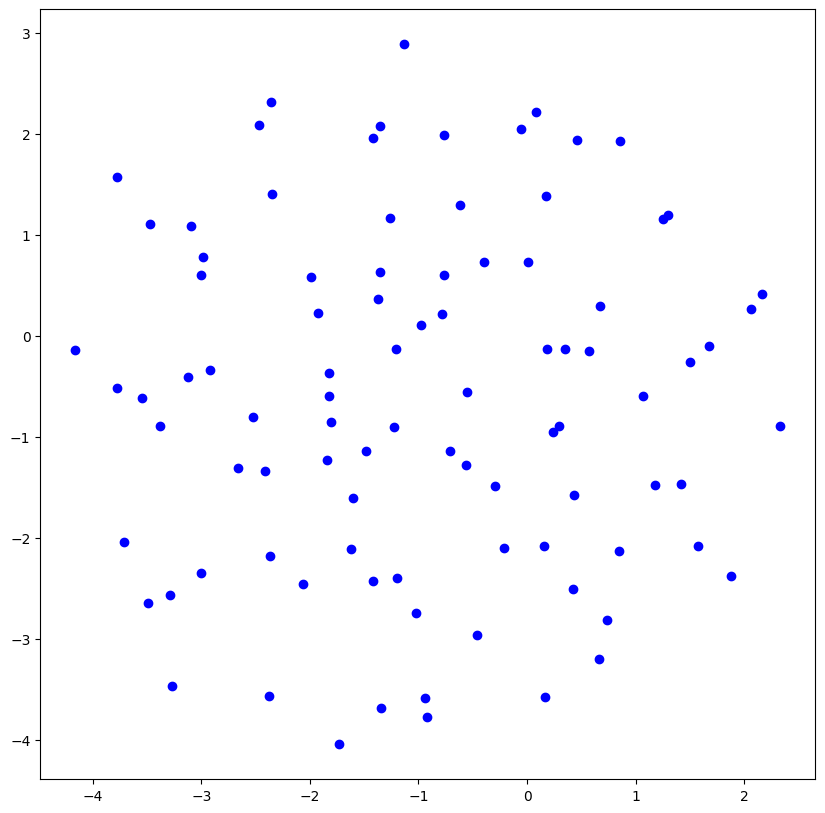

In [78]:
plt.figure(figsize=(10, 10))
plt.scatter(X_new[:,0], X_new[:,1], marker='o', color='blue')

In [79]:
vocab

['models',
 'word',
 'text',
 'predictions',
 'learning',
 'contextual',
 'networks',
 'like',
 'language',
 'next',
 'sequence',
 'prediction',
 'memory',
 'neural',
 'likely',
 'rnns',
 'forecasting',
 'long',
 'shortterm',
 'lstm',
 'sparsity',
 'improved',
 'modeling',
 'task',
 'longer',
 'dependencies',
 'transformerbased',
 'recurrent',
 'data',
 'uses',
 'context',
 'natural',
 'given',
 'processing',
 'nlp',
 'understand',
 'process',
 'human',
 'early',
 'approaches',
 'relied',
 'ngram',
 'gpt',
 'limitations',
 'follows',
 'short',
 'bert',
 'inputs',
 'visual',
 'selfattention',
 'user',
 'experience',
 'making',
 'communication',
 'faster',
 'intuitive',
 'advancements',
 'deep',
 'continue',
 'improve',
 'accuracy',
 'relevance',
 'future',
 'includes',
 'personalized',
 'multimodal',
 'systems',
 'combining',
 'voice',
 'enhances',
 'engines',
 'search',
 'semantics',
 'mechanisms',
 'fullcontext',
 'awareness',
 'trained',
 'massive',
 'corpora',
 'learn',
 'grammar',


Text(0.5, 1.0, 'Word2Vec CBOW Word Embeddings Visualization')

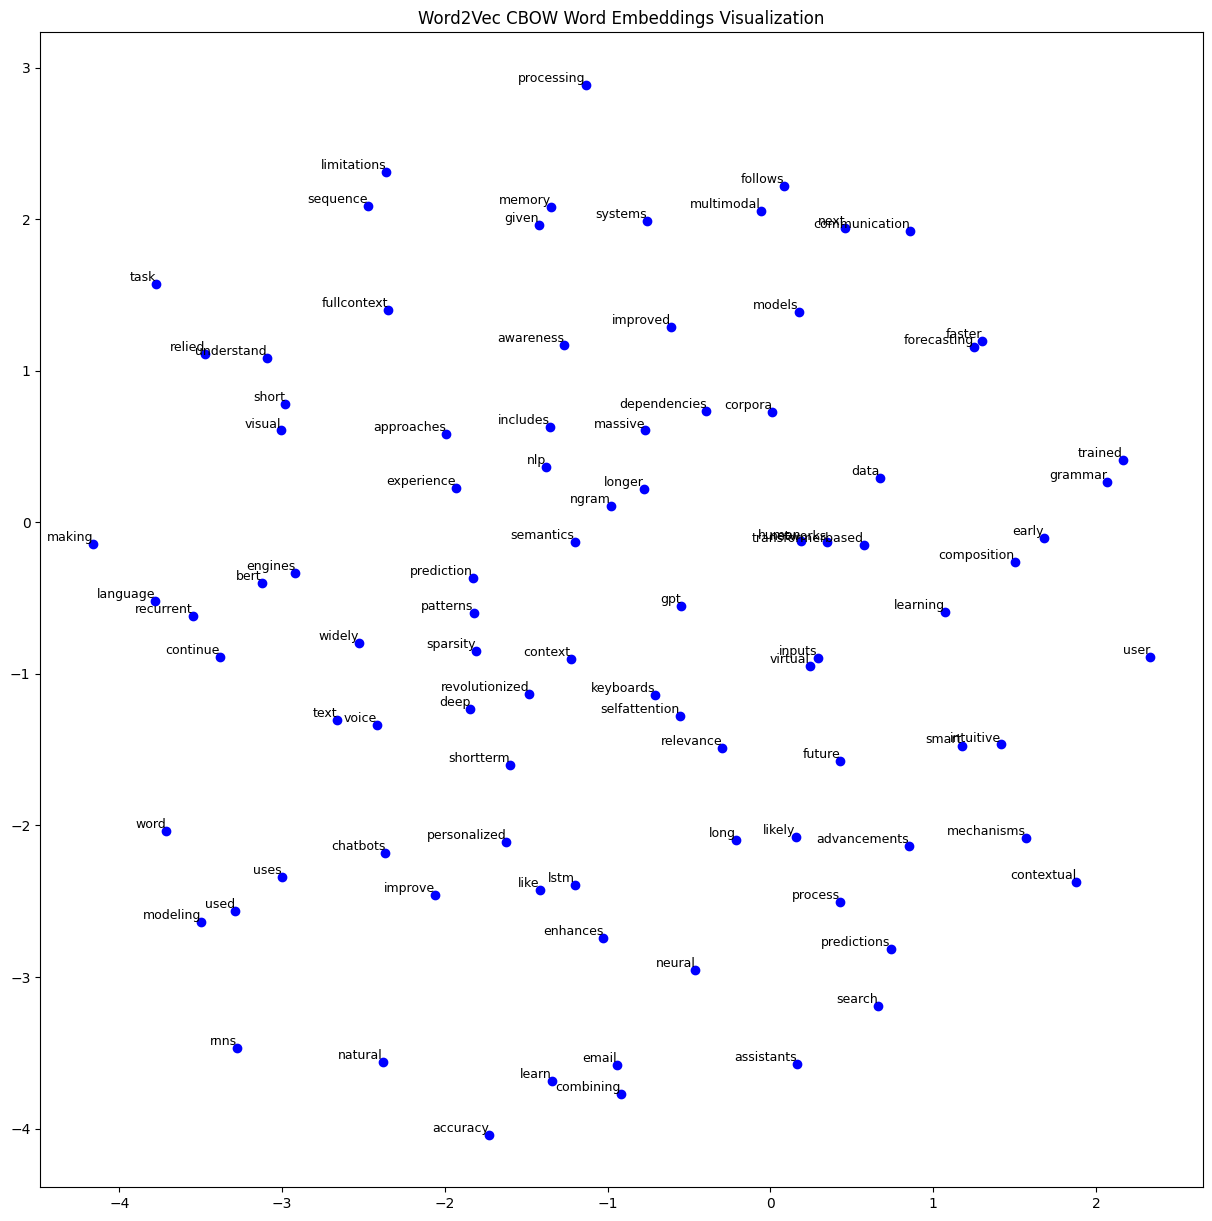

In [85]:
plt.figure(figsize=(15, 15))
plt.scatter(X_new[:,0], X_new[:,1], marker='o', color='blue')
for i, word in enumerate(vocab[:len(X_new)]):
    plt.annotate(word, xy=(X_new[i, 0], X_new[i, 1]), fontsize=9, ha='right', va='bottom')
plt.title("Word2Vec CBOW Word Embeddings Visualization")

In [86]:
print("The End")

The End
